<a href="https://colab.research.google.com/github/aleefamirul/El-Nino-index-3.4/blob/main/El_nino_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/MyDrive/Data_folder/nino34.long.data.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
years = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=0,dtype=int,delimiter=None)
print(years.shape)

(151,)


In [ ]:
data = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=range(1,13),dtype=float,delimiter=None)
print(data.shape)

(151, 12)


In [ ]:
data[data == -99.99] = np.NaN
print(data)

[[25.58 25.57 26.43 ... 25.82 25.86 25.79]
 [26.33 26.18 26.83 ... 26.4  26.35 26.01]
 [25.86 26.14 26.76 ... 25.79 25.86 25.71]
 ...
 [25.72 26.03 26.53 ... 27.57 27.65 27.56]
 [27.09 27.38 28.06 ... 27.29 27.39 27.1 ]
 [27.22 27.25 27.62 ...   nan   nan   nan]]


In [ ]:
data_1d = np.reshape(data(151*12,))#reshape data from 2-D into 1-D

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Reshape data from 2-D into 1-D
data_1d = np.reshape(data, (151*12,))
print(data_1d)

[25.58 25.57 26.43 ...   nan   nan   nan]


In [ ]:
all_months = np.tiles(range(1,13),5)
print(all_months)

AttributeError: module 'numpy' has no attribute 'tiles'

In [ ]:
all_months = np.tile(range(1,13),len(years)) #Changed tiles to tile
print(all_months)

[ 1  2  3 ... 10 11 12]


In [ ]:
all_years = np.repeat(range(1870,2021),12)
print(all_years)

[1870 1870 1870 ... 2020 2020 2020]


In [ ]:
from datetime import datetime
datetimes = [datettime(all_years[idx], all_months[idx], 15) for index in range(data_1d)]
print(datetimes)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
from datetime import datetime
datetimes = [datetime(all_years[idx], all_months[idx], 15) for idx in range(len(data_1d))] # Changed data_1d to len(data_1d) and datettime to datetime
datetimes = np.array(datetimes)
print(datetimes)

[datetime.datetime(1870, 1, 15, 0, 0) datetime.datetime(1870, 2, 15, 0, 0)
 datetime.datetime(1870, 3, 15, 0, 0) ...
 datetime.datetime(2020, 10, 15, 0, 0)
 datetime.datetime(2020, 11, 15, 0, 0)
 datetime.datetime(2020, 12, 15, 0, 0)]


ValueError: not enough values to unpack (expected 2, got 1)

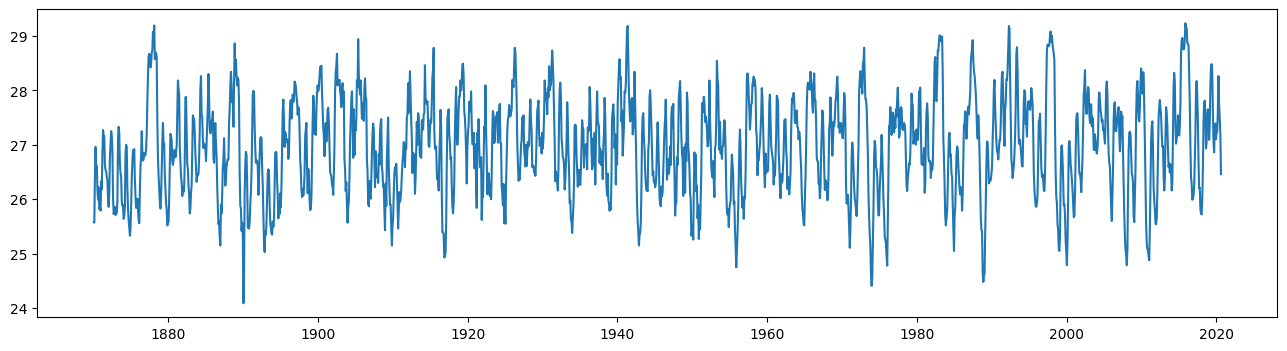

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
fig,ax = plt.plot(datetimes,data_1d)

ax.plot(time, data, c='k' , linestyle='-',linewidth=2, marker=None) #(x axis, y axis, [the rest is optional])

ax.grid()
ax.set_title('El nino index', fontsize=10)
ax.set_xlabel('Time (years)', fontsize=14)
ax.set_ylabel('Temperature (degC)', fontsize=14)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
# Fix: Get the current axes using gca() or create a new one with axes()
ax = plt.gca()  # Get current axes

# Plot the data
ax.plot(datetimes, data_1d)

# Continue with the rest of your plotting customizations
ax.plot(datetimes, data_1d, c

SyntaxError: incomplete input (<ipython-input-46-d17ec566d786>, line 11)

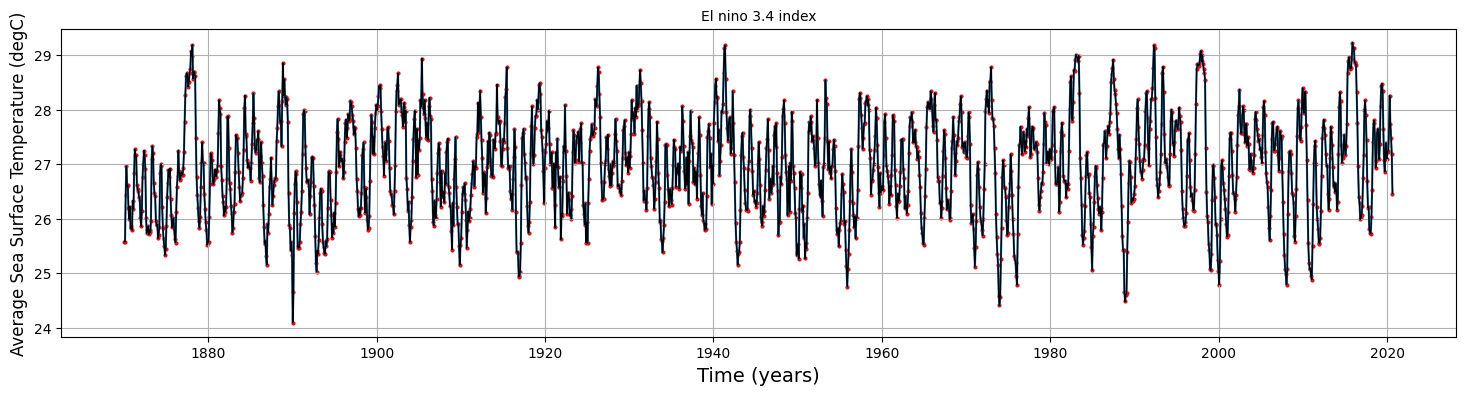

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,4))
# Fix: Get the current axes using gca() or create a new one with axes()
ax = plt.gca()  # Get current axes

# Plot the data
ax.plot(datetimes, data_1d)
plt.scatter(datetimes,data_1d,s=4,c='r')

# Continue with the rest of your plotting customizations
ax.plot(datetimes, data_1d, c='k', linestyle='-', linewidth=1, marker=None)

ax.grid()
ax.set_title('El nino 3.4 index', fontsize=10)
ax.set_xlabel('Time (years)', fontsize=14)
ax.set_ylabel('Average Sea Surface Temperature (degC)', fontsize=12)
plt.show()

